In [ ]:
# To donwload guitarset
!wget https://zenodo.org/record/3371780/files/audio_mono-mic.zip
!unzip audio_mono-mic.zip -d guitarset

In [1]:
import processing
import util
import mir_eval
import numpy as np
import os

In [2]:
soundDir = "guitarset/"
annotationDir = soundDir + "Annotations/"
annotationFiles = os.listdir(annotationDir)
solofiles,chordfiles = util.separateFiles(soundDir,"gs")

Selecting a file, apply onset detection

In [5]:
k = np.random.randint(360)
soundFile = soundDir + annotationFiles[k] + ".wav"
pred,c,f = processing.od(soundFile)

# pred: onset prediction
# c: candidates selected by first spectral flux step. Predictions are subset of candidates
# f: frequency segments that make the candidates selected as onset. {bin: [[score],[start_point,end_point]]}

In [6]:
gt, gtg = util.getOnsets(annotationDir + annotationFiles[k])
# gt: ground truth, gtg: group of merged onsets for each gt

In [7]:
print(soundFile)
mir_eval.onset.evaluate(gt,pred)

guitarset/05_SS1-68-E_comp_mic.wav


OrderedDict([('F-measure', 0.8929889298892989),
             ('Precision', 0.9453125),
             ('Recall', 0.8461538461538461)])

Observing the result

In [8]:
from quickPlayer import quickPlayer
from scipy.io.wavfile import read

In [9]:
# press spacebar to start/stop playing. 
# Navigate by clicking on plot, and with 'zoom' and 'pan' features of the toolbar.
# Zoom: Click and drag. Right click to zoom out.

# The player will automatically follow if zoomed. But if zoomed too much, it may cause stuttering.
# Panning while audio is being played will cause stuttering.

fs,x = read(soundFile)
x = x/np.max(np.abs(x))
quickPlayer(soundFile,[x],[gt*fs,pred*fs],["gt","pred"],1,True)

TclError: invalid command name "."

<Figure size 1800x700 with 1 Axes>

In [15]:
soundDir = "musiccritic_cropped/"
annotationDir = soundDir + "Annotations/"
annotationFiles = os.listdir(annotationDir)
solofiles,chordfiles = util.separateFiles(soundDir,"mc")

In [11]:
scores = np.load("results/scores-SFHA-MC.npy",allow_pickle=True)

In [16]:
util.summarizeScores(scores,chordfiles)

Solo files: 125
F-score: 0.872670
Precision: 0.897817
Recall: 0.854654
Chords files: 107
F-score: 0.814248
Precision: 0.811769
Recall: 0.821024
Overall: 232
F-score: 0.845725
Precision: 0.858131
Recall: 0.839143


In [20]:
# There are only first 10 recordings in the repo. You should acquire other recordings
#  (232 total, check file_list in the folder) in order to play them

k = np.random.randint(10) 
score = scores[k]
print(score[0])
print(score[1])

# score file: 0: filename, 1:Scores ,2:ground truth , 3:predictions, 4:Score of SF candidates, 5: candidates, 6: freq segments

251_recording-0-2019-03-20T11-02-33-346Z-0
OrderedDict([('F-measure', 0.8125), ('Precision', 0.8125), ('Recall', 0.8125)])


In [21]:
util.play(score,"mc",True) # "True": will also show candidates

# gt: ground truth, annotations
# pred: final predictions
# sf: candidates of spectral flux

TclError: invalid command name "."

<Figure size 1800x700 with 1 Axes>

In [22]:
# we can run onset detection in verbose mode with given onset candidate locations.
tp,tn,fp,fn = util.details(score)

In [32]:
tp,tn,fp,fn

([0, 3, 6, 10, 11, 13, 19, 21, 22, 23, 26, 31, 33],
 [1, 2, 5, 7, 8, 9, 12, 14, 15, 16, 18, 20, 24, 25, 27, 29, 30, 32, 34, 35],
 [4, 17, 28],
 [])


Onset candidate:
onset frame: 935
sf onset number: 7
synthesized sound


STFT around candidate


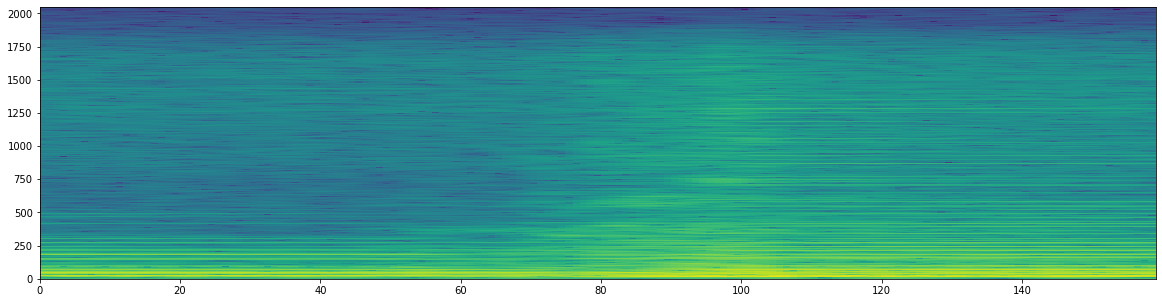

filtered spectral flux


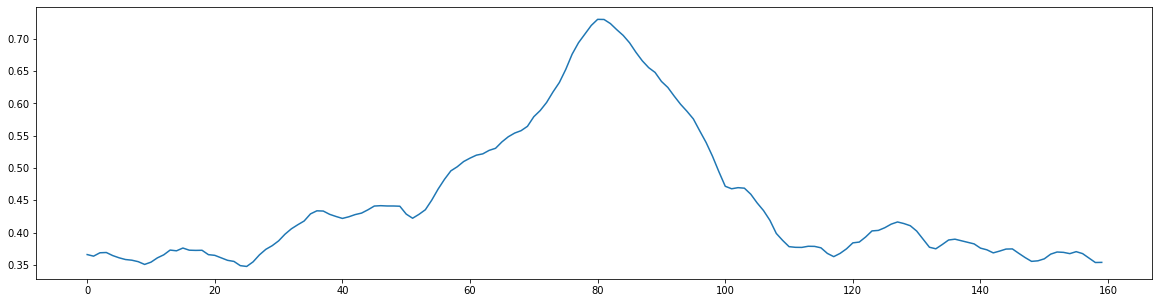

raw spectral flux


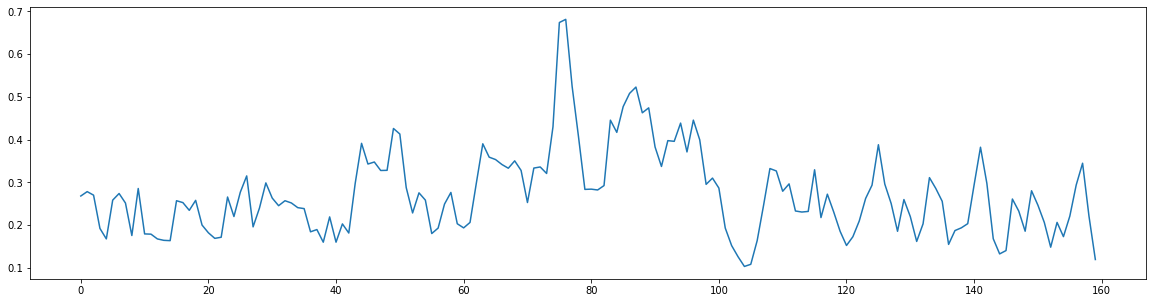

remaining sound after elimination frequencies that do not contribute enough to energy increase for this candidate


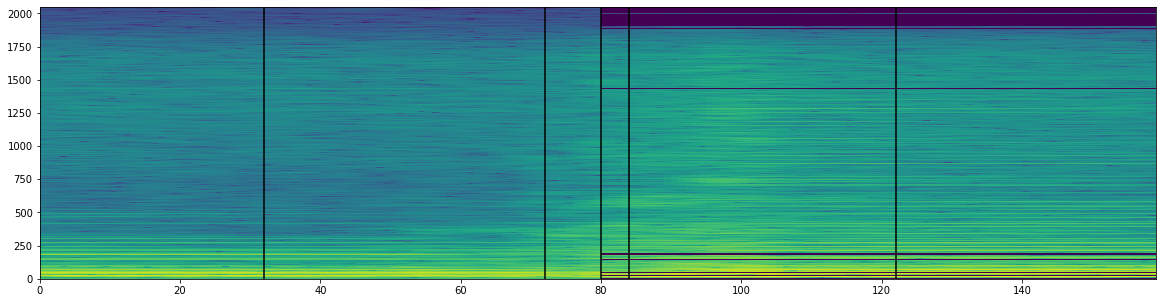

candidate 24 error: 18
candidate 62 error: 1
candidate 41 error: 20
candidate 73 error: 19
candidate 92 error: 4
candidate 12 error: 55
candidate 20 error: 92
candidate 31 error: 25
candidate 36 error: 107
candidate 46 error: 62
Total number of segments: 133


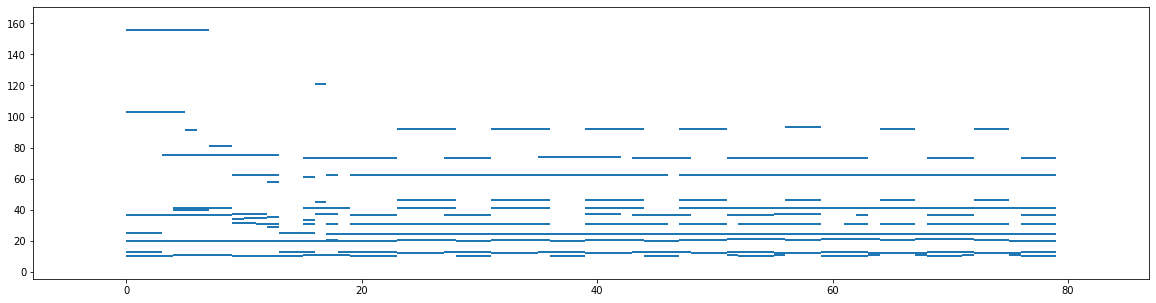

128 due to Length, 0 due to Error, segment skipped
Score for this onset: 497

Onset candidate:
onset frame: 76
sf onset number: 1
synthesized sound


STFT around candidate


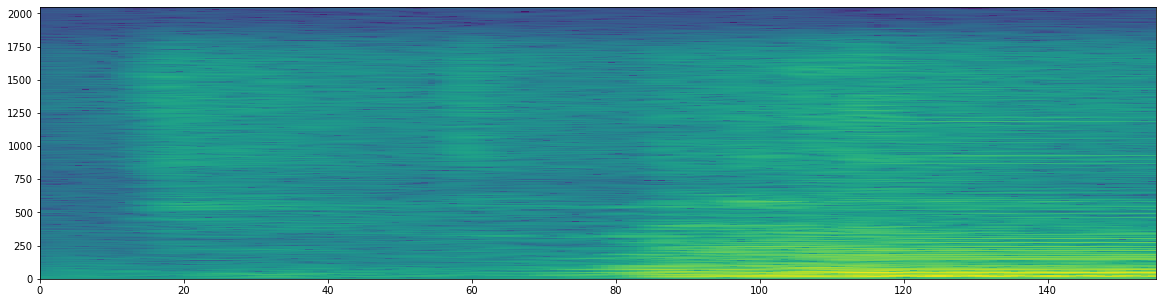

filtered spectral flux


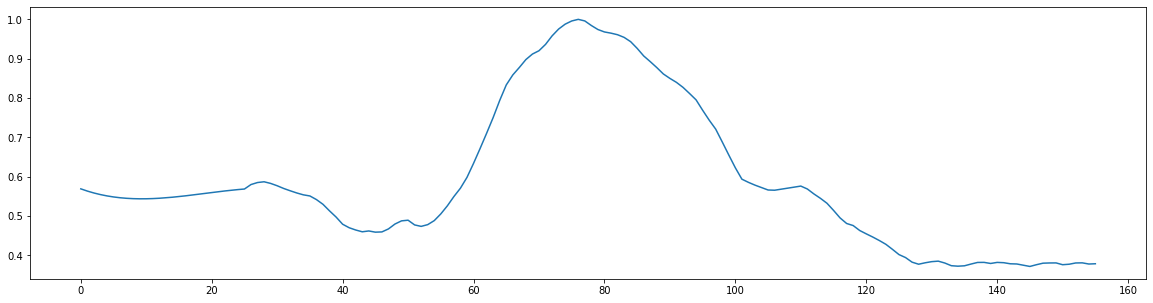

raw spectral flux


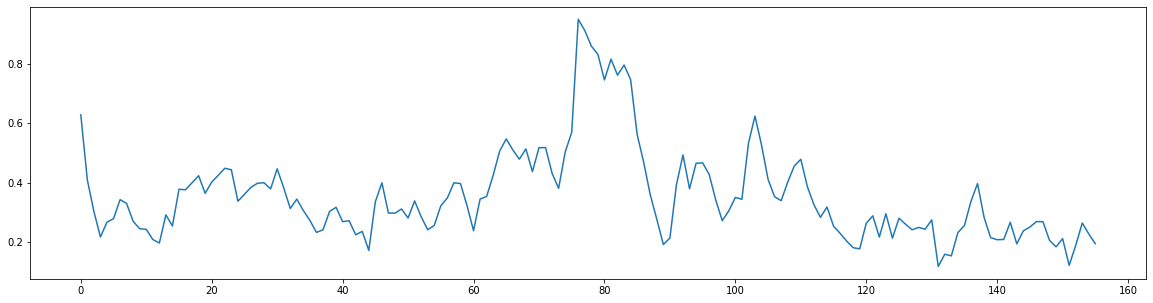

remaining sound after elimination frequencies that do not contribute enough to energy increase for this candidate


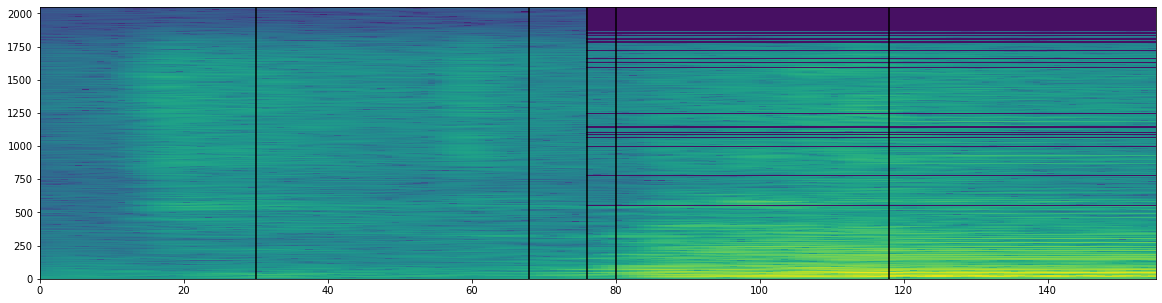

candidate 49 error: 4
candidate 24 error: 0
candidate 30 error: 0
candidate 62 error: 0
candidate 41 error: 0
candidate 7 error: 0
candidate 12 error: 31
candidate 15 error: 1
candidate 20 error: 11
Total number of segments: 127


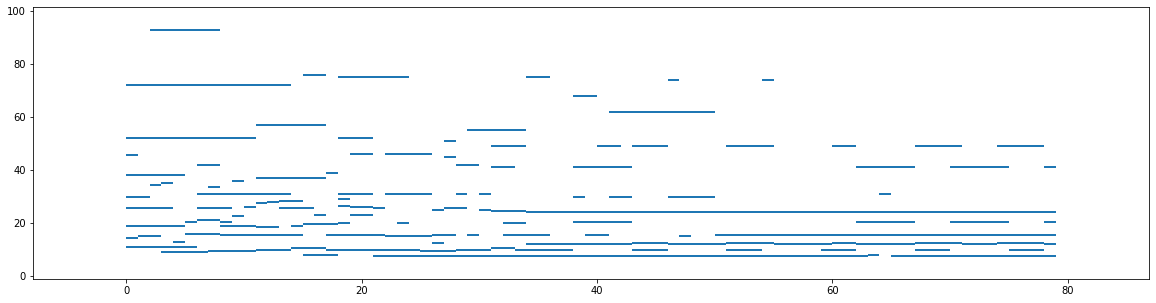

124 due to Length, 0 due to Error, segment skipped
Score for this onset: 852


In [34]:
# observing some onsets
# some changes to algorithm was made after score calculations, some detections saved in scorefile 
# may not be observed below if it is not detected this time.

_,_,_ = processing.od(soundDir+score[0]+".wav",verbose=score[5][tp][:3],oS=True)